In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpi4py import MPI

In [17]:
%%writefile test.py
from mpi4py import MPI
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

def LastXs(x0=0.2, r=2.0, n=1000, last=100):
    x = [x0]
    for i in range(n-1):
        x += [r * x[i] * (1 - x[i])]
    return x[-last:]

n = 1000
rs = []
xs = []
last = 100

start =  MPI.Wtime()

comm = MPI.COMM_WORLD
size=comm.Get_size()
rank=comm.Get_rank()

for r in np.linspace(4*rank/size, 4*(rank+1)/size, int(100000//size)):
    xs += LastXs(r=r, n=n, last=last)
    rs += [r]*last

xs = np.array(comm.gather(xs, root=0))
rs = np.array(comm.gather(rs, root=0))

end = MPI.Wtime()

if rank==0: 
    print(end-start)

    plt.figure(figsize=(20, 10))
    plt.title('Bifurcation diagram')
    sns.scatterplot(x=rs[0], y=xs[0], s=10, linewidth=0.07)
    plt.show()

Overwriting test.py


In [18]:
!mpirun --allow-run-as-root -n 1 python test.py

tcmalloc: large alloc 1073741824 bytes == 0x557463404000 @  0x7f1f682bc1e7 0x557412c6ea08 0x557412cf0bbf 0x557412ced9ce 0x557412cef21b 0x557412cedfda 0x557412cedcc2 0x557412cecf3c 0x557412d82a49 0x7f1f66119777 0x7f1f661aff8d 0x7f1f661b2e45 0x7f1f661b4268 0x557412c3c544 0x557412c3c240 0x557412cb0627 0x557412caa9ee 0x557412caa6f3 0x557412d744c2 0x557412d7483d 0x557412d746e6 0x557412d4c163 0x557412d4be0c 0x7f1f670a6bf7 0x557412d4bcea
103.02758407500005
<Figure size 2000x1000 with 1 Axes>


In [19]:
!mpirun --allow-run-as-root -n 2 python test.py

88.07028039200009
<Figure size 2000x1000 with 1 Axes>


In [20]:
!mpirun --allow-run-as-root -n 3 python test.py

87.05118791300015
<Figure size 2000x1000 with 1 Axes>


In [21]:
!mpirun --allow-run-as-root -n 4 python test.py

89.64950576399997
<Figure size 2000x1000 with 1 Axes>


In [22]:
!mpirun --allow-run-as-root -n 5 python test.py

94.47434531399995
<Figure size 2000x1000 with 1 Axes>


In [23]:
!mpirun --allow-run-as-root -n 6 python test.py

95.92207979
<Figure size 2000x1000 with 1 Axes>


In [24]:
!mpirun --allow-run-as-root -n 7 python test.py

100.14038333899998
<Figure size 2000x1000 with 1 Axes>


In [25]:
!mpirun --allow-run-as-root -n 8 python test.py

111.99039798600006
<Figure size 2000x1000 with 1 Axes>


In [26]:
!mpirun --allow-run-as-root -n 9 python test.py

106.47620222600017
<Figure size 2000x1000 with 1 Axes>


In [27]:
!mpirun --allow-run-as-root -n 10 python test.py

109.05618712700016
<Figure size 2000x1000 with 1 Axes>


Text(0, 0.5, 'Speedup')

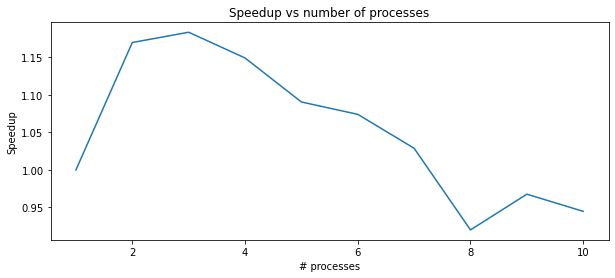

In [30]:
speedup = np.array([103.02758407500005,
                    88.07028039200009,
                    87.05118791300015,
                    89.64950576399997,
                    94.47434531399995,
                    95.92207979,
                    100.14038333899998,
                    111.99039798600006,
                    106.47620222600017,
                    109.05618712700016])
speedup = speedup[0] / speedup
plt.figure(figsize=(10,4))
plt.title('Speedup vs number of processes')
plt.plot(np.arange(1,11), speedup)
plt.xlabel('# processes')
plt.ylabel('Speedup')